In [117]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

In [119]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.__version__

'1.8.1'

## Exercise Set 3

Due 10/22 10am

20 points 10 questions 2 points each

Name your submission your_rcsid_Exercise3.ipynb

### 1) Polynomial Kernel

Given x and z below. Define a function Poly_k that implements the polynomial kernel with r = 0 and d = 2. Also define a function Phi that computes the dot product of the $\phi$ transformation. Show that given the inputs x and z they compute the same value.
$\Phi(\vec{x}) = (x_1^2,\sqrt{2}x_1x_2,x_2^2) $

In [120]:
x = np.array([3,4])
z = np.array([2,5])

# Your Code Here
from math import *
def Poly_k(x, z):
    return pow(np.dot(x, z), 2)

def Phi(x, z):
    x_1 = np.array([pow(x[0], 2), sqrt(2)*x[0] * x[1], pow(x[1], 2)])
    z_1 = np.array([pow(z[0], 2), sqrt(2) * z[0] * z[1], pow(z[1], 2)])
    return np.dot(x_1, z_1)
Poly_k(x, z), Phi(x, z)

(676.0, 676.0)

### Wine Dataset

https://archive-beta.ics.uci.edu/ml/datasets/wine

Dependent Variable is Customer_Segment with values 1 - 3.
Independent Variables in columns 0-12, all numerical.


In [121]:
wine = pd.read_csv("wine.csv")
wine.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [122]:
# Covert to arrays

X = wine.iloc[:,0:4].values
y = wine.loc[:,'Customer_Segment'].values

y =  LabelEncoder().fit_transform(y) # Encode

###  Pytorch

Create and run a pytorch multinomial model

Use the wine data set.

In [123]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 2) Convert numpy arrays to torch tensors

The train and test dependent variables should be type np.int64.

In [124]:
# Your Code Here
X_train_t = torch.from_numpy(X_train.astype(np.float32))
X_test_t = torch.from_numpy(X_test.astype(np.float32))
y_train_t = torch.from_numpy(y_train.astype(np.int64))
y_test_t = torch.from_numpy(y_test.astype(np.int64))


#### 3) Define the model class

One linear layer with 7 nodes. Pass through a ReLU activation function to an output layer.

In [125]:
# Your Code Here
class MultiRegress(nn.Module):
    def __init__(self,num_in,num_out):
        super(MultiRegress, self).__init__() 
        self.linear1 = nn.Linear(num_in, 7)
        self.linear2 = nn.Linear(7, num_out) 
        self.relu = nn.ReLU()
  
    def forward(self, x): 
        x = self.linear1(x)
        x = self.relu(x) 
        return self.linear2(x)
    
model = MultiRegress(X_train.shape[1],3)


#### 4) Define a Cross Entropy Loss criterion and an Adam optimizer

In [126]:
# Your Code Here
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

#### 5) Train the model for 1000 epochs. Print the  training loss and test lost every 100 epochs

In [127]:
# Your Code Here
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  
  optimizer.zero_grad() # zero the parameter gradients

  outputs = model(X_train_t) # Forward pass via __call__, outputs is a tensor
    
  loss = criterion(outputs, y_train_t) # Calculate the loss
    
  loss.backward() # Computes the Gradients
  optimizer.step() # Updates the weights

  # Get test loss
  outputs_test = model(X_test_t)
  loss_test = criterion(outputs_test, y_test_t)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 100 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')



Epoch 100/1000, Train Loss: 0.9341, Test Loss: 0.9497
Epoch 200/1000, Train Loss: 0.6720, Test Loss: 0.7239
Epoch 300/1000, Train Loss: 0.4760, Test Loss: 0.5853
Epoch 400/1000, Train Loss: 0.3818, Test Loss: 0.5486
Epoch 500/1000, Train Loss: 0.3370, Test Loss: 0.5522
Epoch 600/1000, Train Loss: 0.3115, Test Loss: 0.5671
Epoch 700/1000, Train Loss: 0.2953, Test Loss: 0.5755
Epoch 800/1000, Train Loss: 0.2837, Test Loss: 0.5792
Epoch 900/1000, Train Loss: 0.2749, Test Loss: 0.5820
Epoch 1000/1000, Train Loss: 0.2677, Test Loss: 0.5866


#### 6) Predict the test data and calculate the accuracy. Use the PyTorch softmax function.

https://pytorch.org/docs/stable/nn.functional.html

In [128]:
# Your Code Here
def predict(tnsr):
    with torch.no_grad():
      logits = model(tnsr)
      probs = F.softmax(logits)
      probs = probs.numpy()
      return list(map(np.argmax,probs))
preds = predict(X_test_t)
np.sum(preds == y_test)/len(preds)

0.8055555555555556

 
### K-Nearest Neighbor (KNN)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

The K-Nearest Neighbor Classification algorithm classifies a point according to the the class of its K closest neighbors. The KNN Regression algorithm assigns a value to the mean of the K closest neighbors.

Closest is determined by some distance measure, e.g. Euclidean distance. Since it uses a distance measure the data must be scaled.

It is a simple algorithm in that there is no learning of parameters but it often gives very good results.
It is called a Lazy learner since it just uses the training data, it doesn't really learn anything.

The K is a hyperparameter.


### KNN Algorithm

1. Choose K (the number of neighbors to use)

2. Find the K nearest neighbors to the new point $x_{new}$ using a distance measure (most common is Euclidean Distance)  

<div style="font-size: 110%;">
$$\text{Euclidean distance between two points }(x_1,y_1),(x_2,y_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$
</div>
 
 
3. Among these K neighbors count the number in each category (i.e. class)  

4. Assign the new point the category  with the highest count.


The algorithm estimates the conditional probability for class j as the fraction of points in $N_{new}$ with response value j and classifies $X_{new}$ to the class with highest probability.

$$Pr(Y=j|X=x_{new}) = \frac{1}{K}\sum_{i\in{N_{new}}}I(y_i=j)$$

### Distance Measures

 http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html




### KNN Model

Using the Wine data set

#### 7. Split the data into training, validation and test sets.  Display the shapes.

In [129]:
# Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


#### 8) Scale the data

In [130]:
# Your Code Here
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

#### 9. Model definition and execution

Using the wine dataset, create a function whose arguments are the standardized training features, the standardized validation features, the training dependent variable, the validation dependent variable and the number of neighbors.

Use the 'euclidean' metric.

The function returns the accuracy on the validation data.

In [131]:
# Your Code Here
def accuracy(X_train, y_train, X_val, y_val, neighbors):
    knn = KNeighborsClassifier(n_neighbors = neighbors ,metric='euclidean')
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_val)
    return np.sum(y_preds == y_val) / (len(y_preds))

#### 10. Collect and plot the accuracy scores for 1 to 10 nearest neighbors.

The accuracy scores for 1 nearest neighbors: 0.8055555555555556
The accuracy scores for 2 nearest neighbors: 0.8611111111111112
The accuracy scores for 3 nearest neighbors: 0.8333333333333334
The accuracy scores for 4 nearest neighbors: 0.8055555555555556
The accuracy scores for 5 nearest neighbors: 0.8333333333333334
The accuracy scores for 6 nearest neighbors: 0.8333333333333334
The accuracy scores for 7 nearest neighbors: 0.8611111111111112
The accuracy scores for 8 nearest neighbors: 0.8611111111111112
The accuracy scores for 9 nearest neighbors: 0.8611111111111112
The accuracy scores for 10 nearest neighbors: 0.8333333333333334


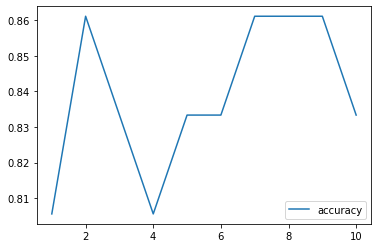

In [132]:
# Your Code Here
acc = []
position = []
for i in range(1, 11):
    position.append(i)
    acc.append(accuracy(X_train, y_train, X_val, y_val, i))
    print('The accuracy scores for {} nearest neighbors: {}'.format(i , acc[i-1]))

plt.plot(np.array(position), np.array(acc), label='accuracy')
plt.legend();
